In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn as sk 

In [2]:
df_crystals = pd.read_csv('data/train_crystals.csv')
df_distances = pd.read_csv('data/train_distances.csv')
df_cent_distances = pd.read_csv('data/train_centroid_distances.csv') 

df_inter = df_crystals.join(df_distances.set_index('identifiers'), on='identifiers')
df = df_inter.join(df_cent_distances.set_index('identifiers'),
                        on='identifiers', rsuffix='_centroid') 

df.head() 
df['mean_centroid']

train = pd.read_csv('data/train_descriptors.csv')

In [3]:
df.head()

,identifiers,n_heavy_atoms,smiles,a,b,c,alpha,beta,gamma,z_value,...,percentile_25,percentile_75,min_centroid,max_centroid,mean_centroid,mode_centroid,median_centroid,std_centroid,percentile_25_centroid,percentile_75_centroid
0,COXSUE,12,CC(=O)NN=C(C)C1=NCCS1,4.7362,17.0760,11.4150,90.0,94.432,90.0,4.0,...,5.939994,10.352198,4.736200,9.147929,7.426769,4.736200,8.088933,1.563737,6.512305,8.652986
1,TUWFAU,15,CC(C)N(C)c1ccc(cc1C#N)C#N,8.9832,12.6212,9.6863,90.0,92.414,90.0,4.0,...,6.603302,10.985316,4.751947,11.683526,8.171218,7.056717,8.596524,1.894844,7.056717,9.235177
2,DUTHEG,14,CC1=CC(=O)N2C(=NC(=NC2=N1)C)N,11.1369,18.9130,4.0311,90.0,90.000,90.0,4.0,...,5.790356,10.413188,4.031100,10.543597,7.449690,4.031100,7.034673,2.328665,5.765142,9.435290
3,AXUDED08,10,COC(=O)c1ccccc1,13.1840,5.9231,16.9510,90.0,90.000,90.0,8.0,...,5.337268,9.426187,4.032894,9.448610,6.808171,4.423993,6.079166,1.978778,5.173547,8.653620
4,ARAGUV,10,CC(=O)NC1=NNC(=C1)C,18.6000,19.9320,7.7992,90.0,90.000,90.0,16.0,...,5.557215,9.660297,5.266146,10.701777,7.114870,5.266146,6.403891,1.997464,5.539808,8.313428


In [4]:
X = train.drop(['identifiers', 'name', 'InchiKey', 'SMILES', 'Unnamed: 0'], axis=1) 
X.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.773011,8.632564,0,0,14.599164,2.244739,4.388162,14.599164,1.216597,3.370933,...,8.764834,54.650723,185.062283,8.046186,219,11,54.0,58.0,4.833333,2.777778
1,10.813451,10.346393,0,0,18.488707,2.357869,4.715737,18.488707,1.232580,3.592641,...,9.421492,46.551655,199.110947,7.111105,364,22,70.0,80.0,6.805556,3.583333
2,10.922841,9.584172,0,0,16.685332,2.436274,4.872549,16.685332,1.191809,3.577079,...,9.693445,46.214439,191.080710,8.307857,271,22,74.0,87.0,5.666667,3.000000
3,7.140017,6.873356,0,0,12.857279,2.214320,4.428639,12.857279,1.285728,3.188884,...,8.703009,38.792641,136.052429,7.558468,121,11,44.0,48.0,3.722222,2.444444
4,7.399237,7.308033,0,0,11.638727,2.249778,4.311276,11.638727,1.163873,3.200300,...,8.616314,52.270726,139.074562,7.319714,125,8,46.0,49.0,4.333333,2.250000


In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
Y = df['mean_centroid'].values
imp.fit(X,Y)
X = imp.transform(X) 

In [6]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
# X = X[:10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= .3, random_state=69) 


In [7]:

#Train the model
ridge = RidgeCV(cv=10)
ridge.fit(X_train, Y_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [8]:
plt.style.use('seaborn-deep')
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    print(prediction.shape)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    
    plt.figure(figsize=(15, 10))
    plt.scatter(prediction, y_test, c='red', label="should be a line", s=5, alpha=0.8)
#     plt.scatter(y_test, 'blue', label="actual", s=5, alpha=0.6)
    plt.legend()
    plt.ylabel('mean_centroid')
    plt.title("MAE {}, MSE {}".format(round(mae,4), round(mae,4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))

(4035,)


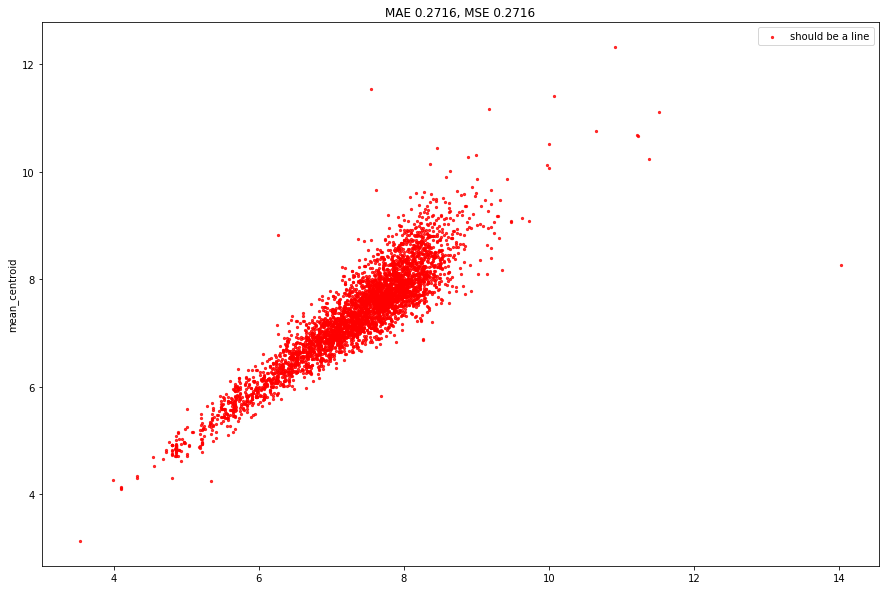

MAE score: 0.2716
MSE score: 0.1408


In [9]:
#Evaluate results
evaluation(ridge, X_test, Y_test)



In [10]:
df_test = pd.read_csv('data/test_descriptors.csv')
df_test = df_test.drop(['identifiers', 'name', 'InchiKey', 'SMILES', 'Unnamed: 0'], axis=1) 
X_test = imp.transform(df_test) 

In [11]:
df_test.head()
test_set = X_test

In [12]:
prediction = ridge.predict(test_set)
prediction.shape

(3363,)

In [13]:
np.savetxt('predictions_task3_milan.csv', prediction)